In [803]:
# Add research knowledge about dataset and a nice PIMA picture :) 

![](image/pima_indins_pic.png)

In [804]:
import numpy as np
import pandas as pd
import pandas_profiling as pf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_colwidth = 130
pima_dictionary = pd.read_excel('pima_dictionary.xlsx', index_col='Column Name')
pima_dictionary

Description
Column Name                                                                                                                          
pregnant                                                                       number of times the woman got pregnant during her life
glucose                                   it represents the plasma glucose concentration at 2 hours in an oral glucose tolerance test
diastolic                                                                       diastolic blood pressure  measures heath of the heart
triceps                                                                                               value used to estimate body fat
insulin                                                             it represents the rate of insulin 2 hours serum insulin (mu U/ml)
bmi          represents the Body Mass Index (weight in kg / (height in meters squared), and is an indicator of the health of a person
diabetes                                                                      it is an indicator of history of diabetes in the family
age                                                                                                  age in years of the Pima’s woman
test                           can take only 2 values (‘negatif’ or ‘positif’) and represents if the patient shows signs of diabetes.

In [805]:
pima = pd.read_csv('PimaIndians.csv') 
pima.head()

pregnant  glucose  diastolic  triceps  insulin   bmi  diabetes  age  \
0         1       89         66       23       94  28.1     0.167   21   
1         0      137         40       35      168  43.1     2.288   33   
2         3       78         50       32       88  31.0     0.248   26   
3         2      197         70       45      543  30.5     0.158   53   
4         1      189         60       23      846  30.1     0.398   59   

      test  
0  negatif  
1  positif  
2  positif  
3  positif  
4  positif

In [806]:
import pandas_profiling as pf
pf.ProfileReport(pima)

In [807]:
# Data looks tidy

In [808]:
pima.dtypes

pregnant       int64
glucose        int64
diastolic      int64
triceps        int64
insulin        int64
bmi          float64
diabetes     float64
age            int64
test          object
dtype: object

In [809]:
# All numeric columns are either integer or float. So there is no misrepresentation

In [810]:
# update data dictionary
pima_dictionary2 = pima_dictionary.copy()
pima_dictionary2['Data Type'] = pima.dtypes
pima_dictionary2

Description  \
Column Name                                                                                                                             
pregnant                                                                       number of times the woman got pregnant during her life   
glucose                                   it represents the plasma glucose concentration at 2 hours in an oral glucose tolerance test   
diastolic                                                                       diastolic blood pressure  measures heath of the heart   
triceps                                                                                               value used to estimate body fat   
insulin                                                             it represents the rate of insulin 2 hours serum insulin (mu U/ml)   
bmi          represents the Body Mass Index (weight in kg / (height in meters squared), and is an indicator of the health of a person   
diabetes                                                                      it is an indicator of history of diabetes in the family   
age                                                                                                  age in years of the Pima’s woman   
test                           can take only 2 values (‘negatif’ or ‘positif’) and represents if the patient shows signs of diabetes.   

            Data Type  
Column Name            
pregnant        int64  
glucose         int64  
diastolic       int64  
triceps         int64  
insulin         int64  
bmi           float64  
diabetes      float64  
age             int64  
test           object

In [811]:
pima.nunique()

pregnant      17
glucose      117
diastolic     37
triceps       48
insulin      184
bmi          194
diabetes     331
age           43
test           2
dtype: int64

In [812]:
c, o = 'continuous', 'ordinal'
d = {'pregnant':c, 'glucose':c, 'diastolic':c, 'triceps':c, 'insulin':c, 'bmi':c,
       'diabetes':c, 'age':c, 'test':o}
pima_dictionary2['Data Type Info'] = pd.Series(d)
pima_dictionary2

Description  \
Column Name                                                                                                                             
pregnant                                                                       number of times the woman got pregnant during her life   
glucose                                   it represents the plasma glucose concentration at 2 hours in an oral glucose tolerance test   
diastolic                                                                       diastolic blood pressure  measures heath of the heart   
triceps                                                                                               value used to estimate body fat   
insulin                                                             it represents the rate of insulin 2 hours serum insulin (mu U/ml)   
bmi          represents the Body Mass Index (weight in kg / (height in meters squared), and is an indicator of the health of a person   
diabetes                                                                      it is an indicator of history of diabetes in the family   
age                                                                                                  age in years of the Pima’s woman   
test                           can take only 2 values (‘negatif’ or ‘positif’) and represents if the patient shows signs of diabetes.   

            Data Type Data Type Info  
Column Name                           
pregnant        int64     continuous  
glucose         int64     continuous  
diastolic       int64     continuous  
triceps         int64     continuous  
insulin         int64     continuous  
bmi           float64     continuous  
diabetes      float64     continuous  
age             int64     continuous  
test           object        ordinal

## Make categoricals from contiuous variables

In [813]:
pima['glucose_Type2-diabetes']=pd.cut(pima['glucose'],[50,139.99,199.99,250],
                            include_lowest=False, labels=['normal', 'prediabetes', 'diabetes'])

In [814]:
pima['bmi_category']=pd.cut(pima['bmi'],[0,18.49,24.9,29.9,70],
                            include_lowest=False, labels=['underweight', 'normal', 'overweight', 'obese'])

In [815]:
pima['diastolic_blood-pressure']=pd.cut(pima['diastolic'],[20,79.99,89.99,115],
                            include_lowest=False, labels=['normal', 'prehypertension', 'high'])

In [816]:
pima.head()

pregnant  glucose  diastolic  triceps  insulin   bmi  diabetes  age  \
0         1       89         66       23       94  28.1     0.167   21   
1         0      137         40       35      168  43.1     2.288   33   
2         3       78         50       32       88  31.0     0.248   26   
3         2      197         70       45      543  30.5     0.158   53   
4         1      189         60       23      846  30.1     0.398   59   

      test glucose_Type2-diabetes bmi_category diastolic_blood-pressure  
0  negatif                 normal   overweight                   normal  
1  positif                 normal        obese                   normal  
2  positif                 normal        obese                   normal  
3  positif            prediabetes        obese                   normal  
4  positif            prediabetes        obese                   normal

In [817]:
pima.nunique()

pregnant                     17
glucose                     117
diastolic                    37
triceps                      48
insulin                     184
bmi                         194
diabetes                    331
age                          43
test                          2
glucose_Type2-diabetes        2
bmi_category                  4
diastolic_blood-pressure      3
dtype: int64

In [818]:
# rearranging column orders
pima.columns

Index(['pregnant', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'diabetes', 'age', 'test', 'glucose_Type2-diabetes', 'bmi_category',
       'diastolic_blood-pressure'],
      dtype='object')

In [819]:
new_order = ['glucose_Type2-diabetes', 'diastolic_blood-pressure', 'bmi_category', 'age', 'pregnant', 'glucose', 'diabetes', 'insulin', 'triceps', 'diastolic', 'bmi', 'test']
pima = pima[new_order]
pima.head()

glucose_Type2-diabetes diastolic_blood-pressure bmi_category  age  pregnant  \
0                 normal                   normal   overweight   21         1   
1                 normal                   normal        obese   33         0   
2                 normal                   normal        obese   26         3   
3            prediabetes                   normal        obese   53         2   
4            prediabetes                   normal        obese   59         1   

   glucose  diabetes  insulin  triceps  diastolic   bmi     test  
0       89     0.167       94       23         66  28.1  negatif  
1      137     2.288      168       35         40  43.1  positif  
2       78     0.248       88       32         50  31.0  positif  
3      197     0.158      543       45         70  30.5  positif  
4      189     0.398      846       23         60  30.1  positif

In [820]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 12 columns):
glucose_Type2-diabetes      392 non-null category
diastolic_blood-pressure    392 non-null category
bmi_category                392 non-null category
age                         392 non-null int64
pregnant                    392 non-null int64
glucose                     392 non-null int64
diabetes                    392 non-null float64
insulin                     392 non-null int64
triceps                     392 non-null int64
diastolic                   392 non-null int64
bmi                         392 non-null float64
test                        392 non-null object
dtypes: category(3), float64(2), int64(6), object(1)
memory usage: 29.2+ KB


In [821]:
#No null values wow!
# data types it seems like all datatypes are correctly distinguished. No object type for a numeric column

In [822]:
pima.shape

(392, 12)

In [823]:
# Not imbalanced data
pima['test'].value_counts()

negatif    262
positif    130
Name: test, dtype: int64

In [824]:
pima['pregnant'].value_counts()

1     93
2     64
0     56
3     45
4     27
5     21
7     20
6     19
8     14
9     11
10     6
11     5
12     5
13     3
15     1
14     1
17     1
Name: pregnant, dtype: int64

In [825]:
# No need to make categorical because it is from 0 to 17 , until absolutely necessary

In [826]:
pima.corr()#.max()

age  pregnant   glucose  diabetes   insulin   triceps  \
age        1.000000  0.679608  0.343641  0.085029  0.217082  0.167761   
pregnant   0.679608  1.000000  0.198291  0.007562  0.078984  0.093209   
glucose    0.343641  0.198291  1.000000  0.140180  0.581223  0.198856   
diabetes   0.085029  0.007562  0.140180  1.000000  0.135906  0.160499   
insulin    0.217082  0.078984  0.581223  0.135906  1.000000  0.182199   
triceps    0.167761  0.093209  0.198856  0.160499  0.182199  1.000000   
diastolic  0.300039  0.213355  0.210027 -0.015971  0.098512  0.232571   
bmi        0.069814 -0.025347  0.209516  0.158771  0.226397  0.664355   

           diastolic       bmi  
age         0.300039  0.069814  
pregnant    0.213355 -0.025347  
glucose     0.210027  0.209516  
diabetes   -0.015971  0.158771  
insulin     0.098512  0.226397  
triceps     0.232571  0.664355  
diastolic   1.000000  0.304403  
bmi         0.304403  1.000000

In [827]:
# bmi vs triceps and age vs pregnency is highly correlated

In [828]:
pima.isna().sum()#.sum()
# no null values

glucose_Type2-diabetes      0
diastolic_blood-pressure    0
bmi_category                0
age                         0
pregnant                    0
glucose                     0
diabetes                    0
insulin                     0
triceps                     0
diastolic                   0
bmi                         0
test                        0
dtype: int64

In [829]:
pima_dictionary2['Missing Values'] = pima.isna().sum()
pima_dictionary2

Description  \
Column Name                                                                                                                             
pregnant                                                                       number of times the woman got pregnant during her life   
glucose                                   it represents the plasma glucose concentration at 2 hours in an oral glucose tolerance test   
diastolic                                                                       diastolic blood pressure  measures heath of the heart   
triceps                                                                                               value used to estimate body fat   
insulin                                                             it represents the rate of insulin 2 hours serum insulin (mu U/ml)   
bmi          represents the Body Mass Index (weight in kg / (height in meters squared), and is an indicator of the health of a person   
diabetes                                                                      it is an indicator of history of diabetes in the family   
age                                                                                                  age in years of the Pima’s woman   
test                           can take only 2 values (‘negatif’ or ‘positif’) and represents if the patient shows signs of diabetes.   

            Data Type Data Type Info  Missing Values  
Column Name                                           
pregnant        int64     continuous               0  
glucose         int64     continuous               0  
diastolic       int64     continuous               0  
triceps         int64     continuous               0  
insulin         int64     continuous               0  
bmi           float64     continuous               0  
diabetes      float64     continuous               0  
age             int64     continuous               0  
test           object        ordinal               0

In [830]:
# Rough
pima.duplicated(keep=False).sum()

0

In [831]:
# Rough
pima = pima.drop_duplicates()
pima.shape

(392, 12)

In [832]:
# Rough
pima.corr()

age  pregnant   glucose  diabetes   insulin   triceps  \
age        1.000000  0.679608  0.343641  0.085029  0.217082  0.167761   
pregnant   0.679608  1.000000  0.198291  0.007562  0.078984  0.093209   
glucose    0.343641  0.198291  1.000000  0.140180  0.581223  0.198856   
diabetes   0.085029  0.007562  0.140180  1.000000  0.135906  0.160499   
insulin    0.217082  0.078984  0.581223  0.135906  1.000000  0.182199   
triceps    0.167761  0.093209  0.198856  0.160499  0.182199  1.000000   
diastolic  0.300039  0.213355  0.210027 -0.015971  0.098512  0.232571   
bmi        0.069814 -0.025347  0.209516  0.158771  0.226397  0.664355   

           diastolic       bmi  
age         0.300039  0.069814  
pregnant    0.213355 -0.025347  
glucose     0.210027  0.209516  
diabetes   -0.015971  0.158771  
insulin     0.098512  0.226397  
triceps     0.232571  0.664355  
diastolic   1.000000  0.304403  
bmi         0.304403  1.000000

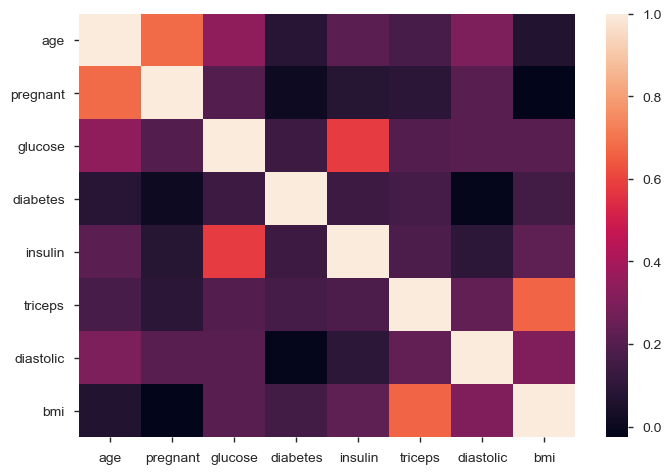

In [833]:
# Rough
sns.heatmap(data = pima.corr())

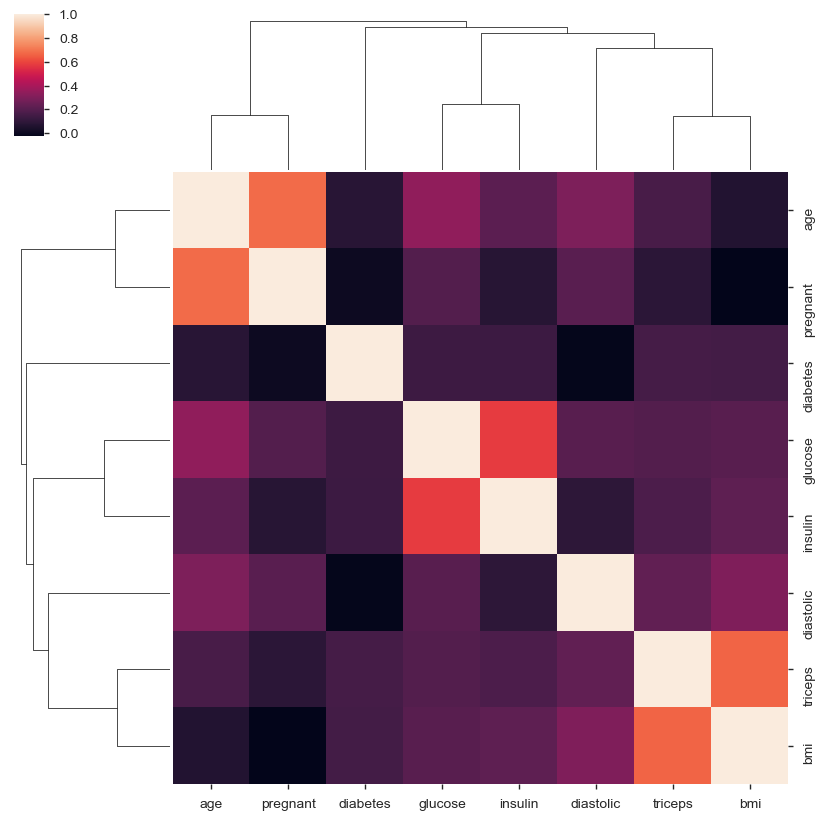

In [834]:
# Rough
sns.clustermap(pima.corr())

In [835]:
pima.head()
pima_nu = pima[['age', 'pregnant', 'glucose', 'diabetes', 'insulin', 'triceps',
       'diastolic', 'bmi']]
pima_nu.head(2)

age  pregnant  glucose  diabetes  insulin  triceps  diastolic   bmi
0   21         1       89     0.167       94       23         66  28.1
1   33         0      137     2.288      168       35         40  43.1

In [836]:
pima_nu['test2'] = pima['test'].map( {'negatif': 0, 'positif': 1} )

In [837]:
pima.columns

Index(['glucose_Type2-diabetes', 'diastolic_blood-pressure', 'bmi_category',
       'age', 'pregnant', 'glucose', 'diabetes', 'insulin', 'triceps',
       'diastolic', 'bmi', 'test'],
      dtype='object')

In [838]:
pima_nu.head(2)

age  pregnant  glucose  diabetes  insulin  triceps  diastolic   bmi  test2
0   21         1       89     0.167       94       23         66  28.1      0
1   33         0      137     2.288      168       35         40  43.1      1

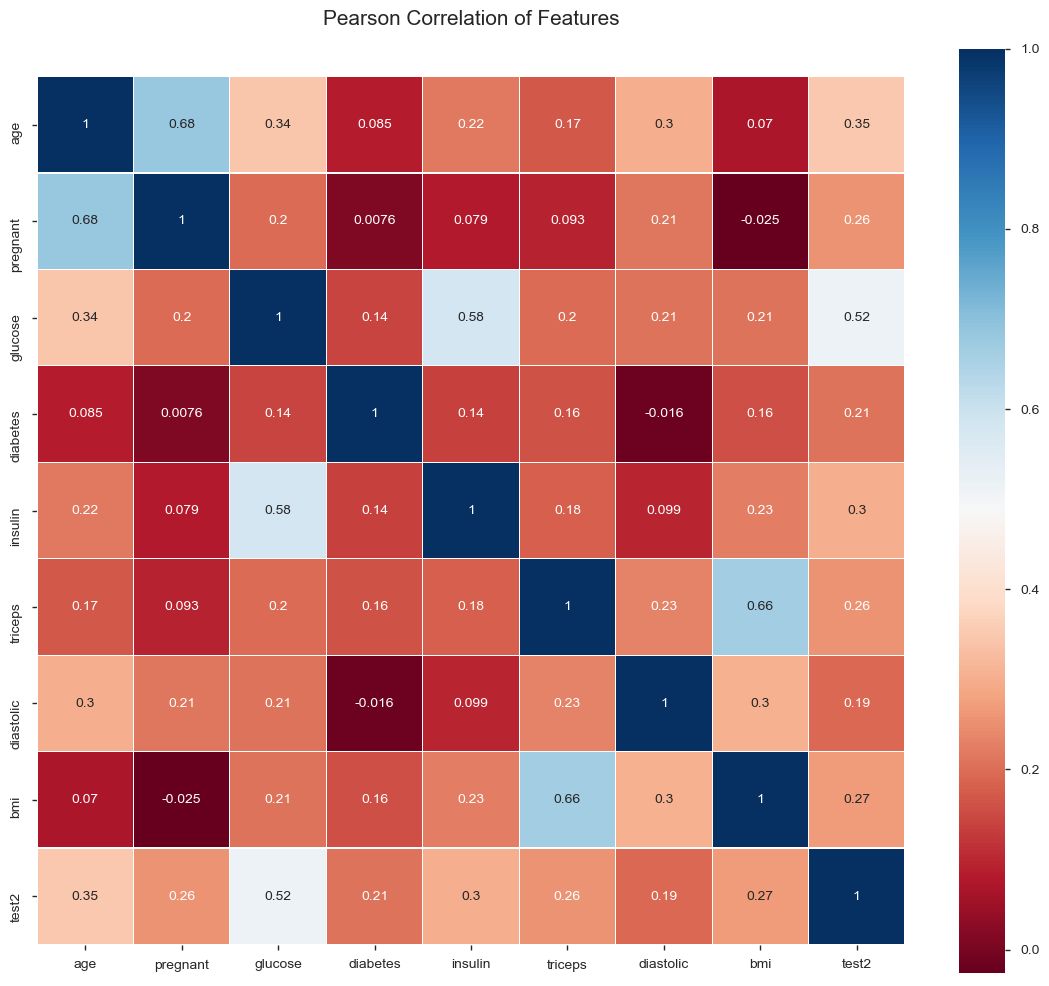

In [839]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(pima_nu.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [840]:
# feature glucose is most strongly correlated with +ve/-ve detection of diaetes as we can guess

# change following statement accordingly

One thing that that the Pearson Correlation plot can tell us is that there are not too many features strongly correlated with one another. This is good from a point of view of feeding these features into your learning model because this means that there isn't much redundant or superfluous data in our training set and we are happy that each feature carries with it some unique information. Here are two most correlated features are that of Family size and Parch (Parents and Children). I'll still leave both features in for the purposes of this exercise.

In [841]:
len(pima[pima['diabetes']>1])#.sort_values(ascending=False) # weird

30

## 1. BMI

In [842]:
pima['bmi'].max()

67.1

In [843]:
pima['bmi_category']=pd.cut(pima['bmi'],[0,18.49,24.9,29.9,70],
                            include_lowest=False, labels=['underweight', 'normal', 'overweight', 'obese'])

In [844]:
pima.tail(4)

glucose_Type2-diabetes diastolic_blood-pressure bmi_category  age  \
388                 normal          prehypertension        obese   37   
389                 normal                   normal   overweight   22   
390                 normal                   normal        obese   63   
391                 normal                   normal   overweight   30   

     pregnant  glucose  diabetes  insulin  triceps  diastolic   bmi     test  
388         1      128     1.057      110       39         88  36.5  positif  
389         2       88     0.766       16       26         58  28.4  negatif  
390        10      101     0.171      180       48         76  32.9  negatif  
391         5      121     0.245      112       23         72  26.2  negatif

In [845]:
pima['bmi_category'].unique()

[overweight, obese, normal, underweight]
Categories (4, object): [underweight < normal < overweight < obese]

In [846]:
pima['bmi_category'].value_counts()

obese          262
overweight      85
normal          44
underweight      1
Name: bmi_category, dtype: int64

In [847]:
pima[pima['bmi_category']=='underweight']

glucose_Type2-diabetes diastolic_blood-pressure bmi_category  age  \
268                 normal                   normal  underweight   21   

     pregnant  glucose  diabetes  insulin  triceps  diastolic   bmi     test  
268         1       97     0.299       82       19         64  18.2  negatif

In [848]:
pima[pima['bmi_category']=='normal']['test'].value_counts()

negatif    42
positif     2
Name: test, dtype: int64

In [849]:
pima[pima['bmi_category']=='obese']['test'].value_counts()

negatif    152
positif    110
Name: test, dtype: int64

In [850]:
# Not a sole impacter but we see the contrast 

## 2. Glucose

In [851]:
# glucose tolerance test can screen for type 2 diabetes 
# a modified version of GTT can diagnose gestational diabetes 
# that develop during pregnancy. Need to check with higher pregnancy is there any change in gestational diabetes 

In [852]:
pima['glucose'].min()

56

In [853]:
pima['glucose'].max()

198

In [854]:
pima['glucose_Type2-diabetes']=pd.cut(pima['glucose'],[50,139.99,199.99,250],
                            include_lowest=False, labels=['normal', 'prediabetes', 'diabetes'])

In [855]:
pima[pima['glucose']==140]

glucose_Type2-diabetes diastolic_blood-pressure bmi_category  age  \
101            prediabetes                   normal        obese   24   
188            prediabetes          prehypertension        obese   58   
353            prediabetes                   normal       normal   23   

     pregnant  glucose  diabetes  insulin  triceps  diastolic   bmi     test  
101         0      140     0.431      130       26         65  42.6  positif  
188        12      140     0.528      325       43         82  39.2  positif  
353         1      140     0.828      180       26         74  24.1  negatif

In [856]:
pima['glucose_Type2-diabetes'].value_counts()

normal         284
prediabetes    108
diabetes         0
Name: glucose_Type2-diabetes, dtype: int64

In [857]:
pima['glucose_Type2-diabetes']=pd.cut(pima['glucose'],[50,94.99,199.99,250],
                            include_lowest=False, labels=['normal', 'prediabetes', 'diabetes'])

In [858]:
pima[pima['glucose_Type2-diabetes']=='prediabetes']['test'].value_counts()

negatif    195
positif    125
Name: test, dtype: int64

In [859]:
pima[pima['glucose_Type2-diabetes']=='normal']['test'].value_counts()
# Does not match perfect as test includes all kind of diabetes
# also it counts positive for any sign of diabetes

negatif    67
positif     5
Name: test, dtype: int64

## 3.diastolic

In [860]:
pima['diastolic'].min()

24

In [861]:
pima['diastolic'].max()

110

In [862]:
pima['diastolic_blood-pressure']=pd.cut(pima['diastolic'],[20,79.99,89.99,115],
                            include_lowest=False, labels=['normal', 'prehypertension', 'high'])

In [863]:
pima.head()

glucose_Type2-diabetes diastolic_blood-pressure bmi_category  age  pregnant  \
0                 normal                   normal   overweight   21         1   
1            prediabetes                   normal        obese   33         0   
2                 normal                   normal        obese   26         3   
3            prediabetes                   normal        obese   53         2   
4            prediabetes                   normal        obese   59         1   

   glucose  diabetes  insulin  triceps  diastolic   bmi     test  
0       89     0.167       94       23         66  28.1  negatif  
1      137     2.288      168       35         40  43.1  positif  
2       78     0.248       88       32         50  31.0  positif  
3      197     0.158      543       45         70  30.5  positif  
4      189     0.398      846       23         60  30.1  positif

In [864]:
pima['diastolic_blood-pressure'].value_counts()

normal             297
prehypertension     73
high                22
Name: diastolic_blood-pressure, dtype: int64

In [865]:
pima[pima['diastolic_blood-pressure']=='high']['test'].value_counts()

positif    13
negatif     9
Name: test, dtype: int64

In [866]:
pima[pima['diastolic_blood-pressure']=='prehypertension']['test'].value_counts()

negatif    42
positif    31
Name: test, dtype: int64

In [867]:
# Not a sole impacter

In [868]:
pima.head()

glucose_Type2-diabetes diastolic_blood-pressure bmi_category  age  pregnant  \
0                 normal                   normal   overweight   21         1   
1            prediabetes                   normal        obese   33         0   
2                 normal                   normal        obese   26         3   
3            prediabetes                   normal        obese   53         2   
4            prediabetes                   normal        obese   59         1   

   glucose  diabetes  insulin  triceps  diastolic   bmi     test  
0       89     0.167       94       23         66  28.1  negatif  
1      137     2.288      168       35         40  43.1  positif  
2       78     0.248       88       32         50  31.0  positif  
3      197     0.158      543       45         70  30.5  positif  
4      189     0.398      846       23         60  30.1  positif

In [869]:
pima['age'].min(),pima['age'].max()

(21, 81)

In [870]:
pima[pima['pregnant']>=1]['age'].min(), pima[pima['pregnant']>=1]['age'].max()

(21, 81)

In [871]:
filt  = pima['pregnant']>=1
pima[filt]['test'].value_counts()#[1]

negatif    225
positif    111
Name: test, dtype: int64

In [872]:
pima[~filt]['test'].value_counts()

negatif    37
positif    19
Name: test, dtype: int64

In [873]:
# impact of pregnancy not on testing +ve

In [874]:
pima.nunique()

glucose_Type2-diabetes        2
diastolic_blood-pressure      3
bmi_category                  4
age                          43
pregnant                     17
glucose                     117
diabetes                    331
insulin                     184
triceps                      48
diastolic                    37
bmi                         194
test                          2
dtype: int64

In [875]:
# Data Analysis

In [876]:
# Univariate vs Bivariate (and multivariate) Analyses

Continuous variable

There are more options when doing univariate analysis on continuous variables. 

Tukey proposed a 5 number summary: min, max, median and first and third quartiles (IQR - interquartile range).


Boxplots are great for detecting possible outliers and
Histograms and kernel density plots (KDE) are excellent for examining the distribution.

In [877]:
# uNIVARIATE ANALYSIS ON CONTINUOUS VARIABLES

In [878]:
#Quick and dirty with describe FOR CONTINUOUS variables
pima.describe().T

count        mean         std     min       25%       50%      75%  \
age        392.0   30.864796   10.200777  21.000  23.00000   27.0000   36.000   
pregnant   392.0    3.301020    3.211424   0.000   1.00000    2.0000    5.000   
glucose    392.0  122.627551   30.860781  56.000  99.00000  119.0000  143.000   
diabetes   392.0    0.523046    0.345488   0.085   0.26975    0.4495    0.687   
insulin    392.0  156.056122  118.841690  14.000  76.75000  125.5000  190.000   
triceps    392.0   29.145408   10.516424   7.000  21.00000   29.0000   37.000   
diastolic  392.0   70.663265   12.496092  24.000  62.00000   70.0000   78.000   
bmi        392.0   33.086224    7.027659  18.200  28.40000   33.2000   37.100   

              max  
age         81.00  
pregnant    17.00  
glucose    198.00  
diabetes     2.42  
insulin    846.00  
triceps     63.00  
diastolic  110.00  
bmi         67.10

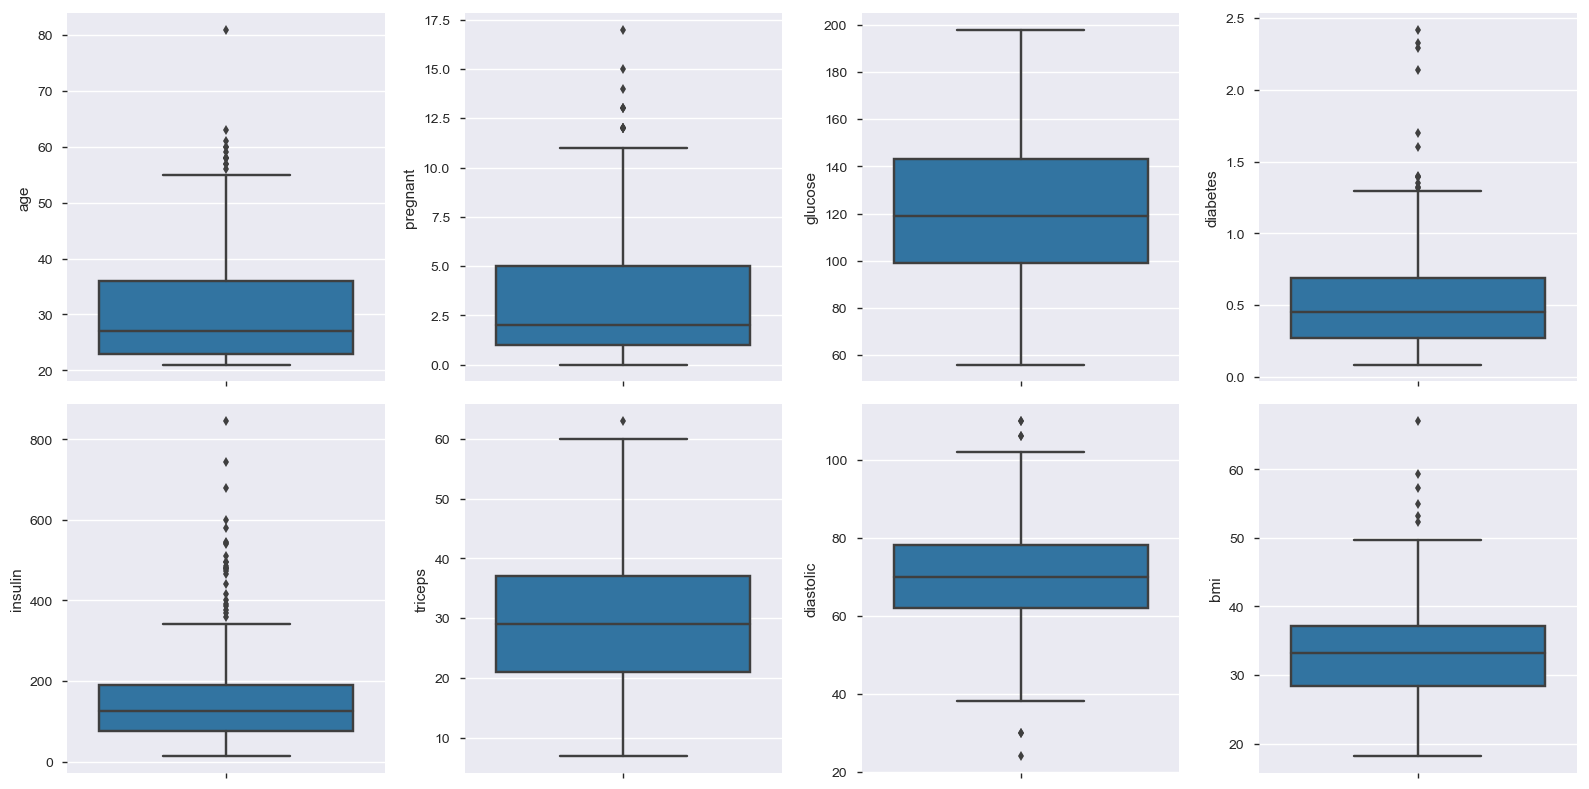

In [879]:
fig, axes = plt.subplots(2,4, figsize = (16,8), sharex=False, sharey=False)
sns.boxplot(y='age',data=pima, ax=axes[0,0])
sns.boxplot(y='pregnant',data=pima, ax=axes[0,1])
sns.boxplot(y='glucose',data=pima, ax=axes[0,2])
sns.boxplot(y='diabetes',data=pima, ax=axes[0,3])
sns.boxplot(y='insulin',data=pima, ax=axes[1,0])
sns.boxplot(y='triceps',data=pima, ax=axes[1,1])
sns.boxplot(y='diastolic',data=pima, ax=axes[1,2])
sns.boxplot(y='bmi',data=pima, ax=axes[1,3])
plt.tight_layout()

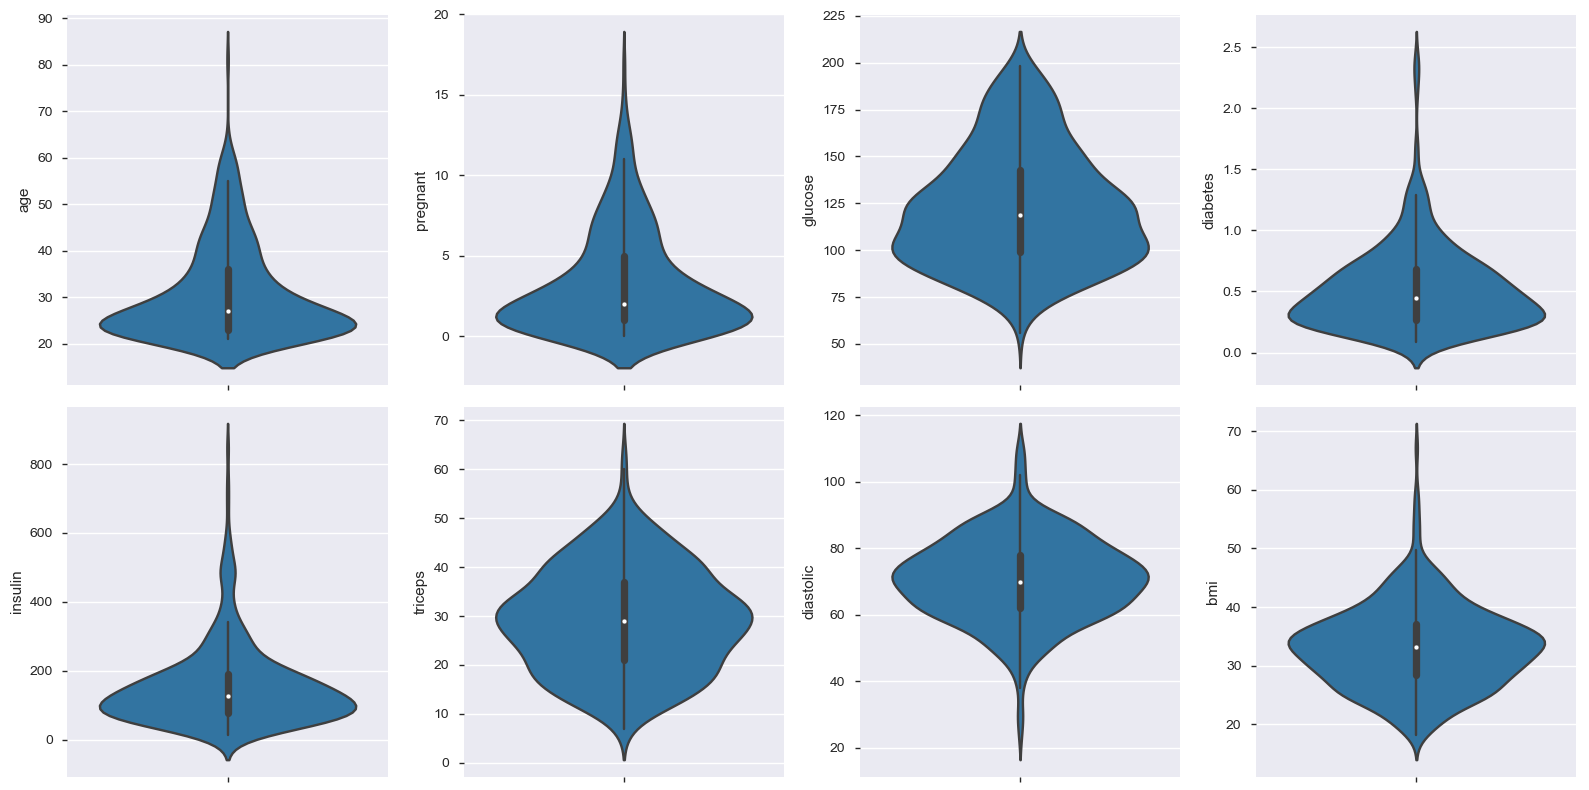

In [880]:
fig, axes = plt.subplots(2,4, figsize = (16,8), sharex=False, sharey=False)
sns.violinplot(y='age',data=pima, ax=axes[0,0])
sns.violinplot(y='pregnant',data=pima, ax=axes[0,1])
sns.violinplot(y='glucose',data=pima, ax=axes[0,2])
sns.violinplot(y='diabetes',data=pima, ax=axes[0,3])
sns.violinplot(y='insulin',data=pima, ax=axes[1,0])
sns.violinplot(y='triceps',data=pima, ax=axes[1,1])
sns.violinplot(y='diastolic',data=pima, ax=axes[1,2])
sns.violinplot(y='bmi',data=pima, ax=axes[1,3])
plt.tight_layout()

In [881]:
# from distribution seems like most people  in the dataset are from lower age group 

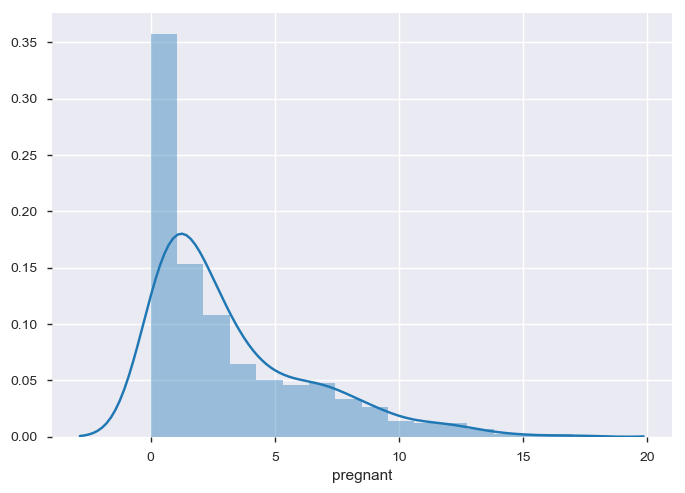

In [882]:
sns.distplot(pima['pregnant'])

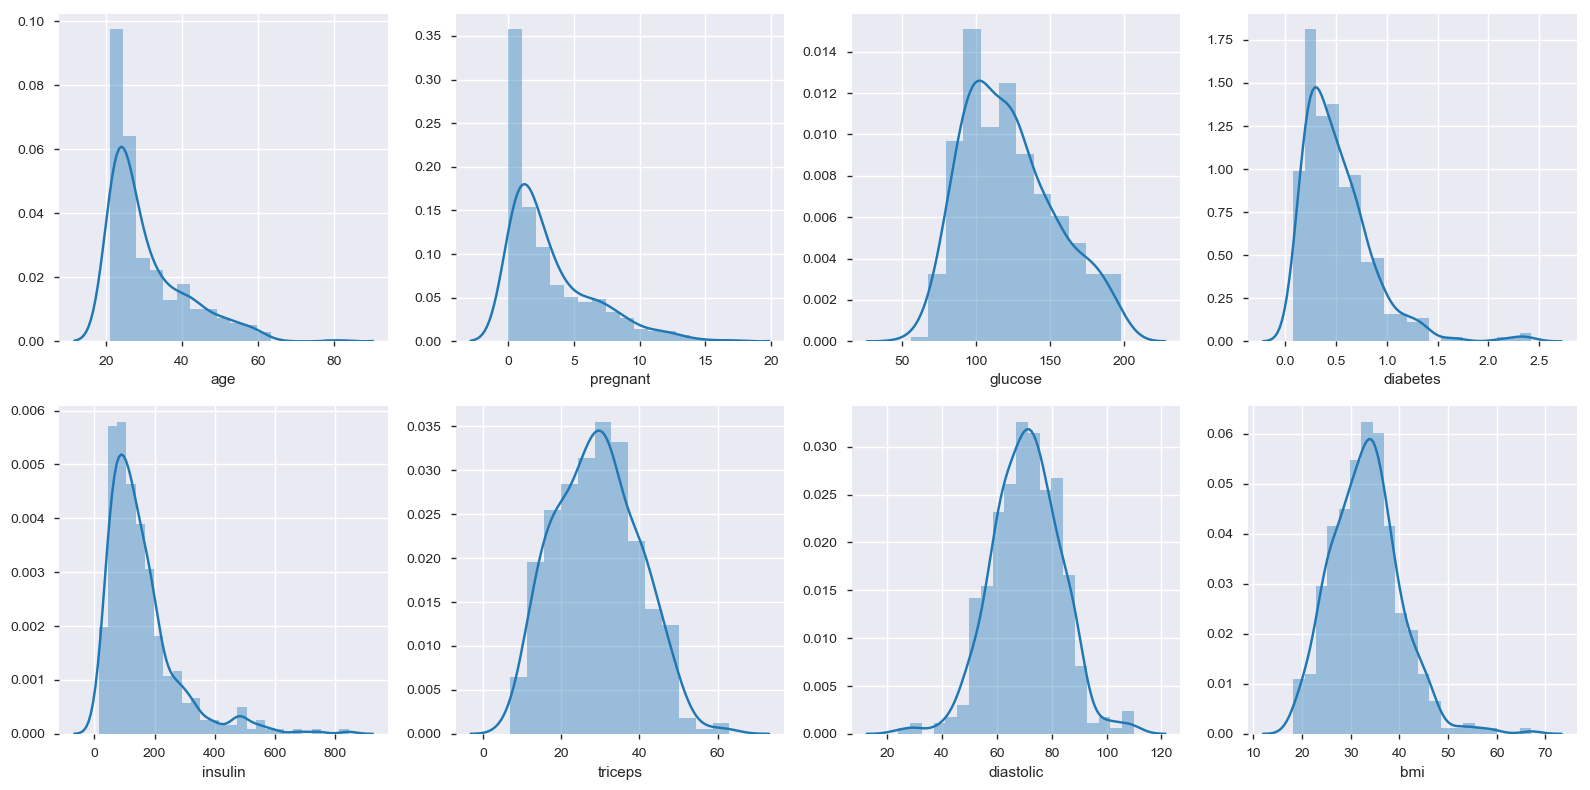

In [883]:
fig, axes = plt.subplots(2,4, figsize = (16,8), sharex=False, sharey=False)
sns.distplot(pima['age'], ax=axes[0,0])
sns.distplot(pima['pregnant'], ax=axes[0,1])
sns.distplot(pima['glucose'], ax=axes[0,2])
sns.distplot(pima['diabetes'], ax=axes[0,3])
sns.distplot(pima['insulin'], ax=axes[1,0])
sns.distplot(pima['triceps'], ax=axes[1,1])
sns.distplot(pima['diastolic'], ax=axes[1,2])
sns.distplot(pima['bmi'], ax=axes[1,3])
plt.tight_layout()

In [884]:
# Need to see confidence around the ---- statistics  so lets bootstrap

In [885]:
def standard_deviation(df):
    for i in df.columns:
        df[i].std()
        print('standard_deviation', i,df[i].std())

In [886]:
#standard_deviation(pima)

In [887]:
pima_std = pima.std()
pima_std.round(2)

age           10.20
pregnant       3.21
glucose       30.86
diabetes       0.35
insulin      118.84
triceps       10.52
diastolic     12.50
bmi            7.03
dtype: float64

In [888]:
pima_std.index

Index(['age', 'pregnant', 'glucose', 'diabetes', 'insulin', 'triceps',
       'diastolic', 'bmi'],
      dtype='object')

In [889]:
def std_bootstrap(df):
    for i in pima_std.index:
        value = np.mean(([pima['age'].sample(frac=1, replace=True).std() for i in range(100)])).round(2)
        print(i, value)

In [890]:
std_bootstrap(pima)

age 10.22
pregnant 10.11
glucose 10.17
diabetes 10.18
insulin 10.17
triceps 10.21
diastolic 10.13
bmi 10.19


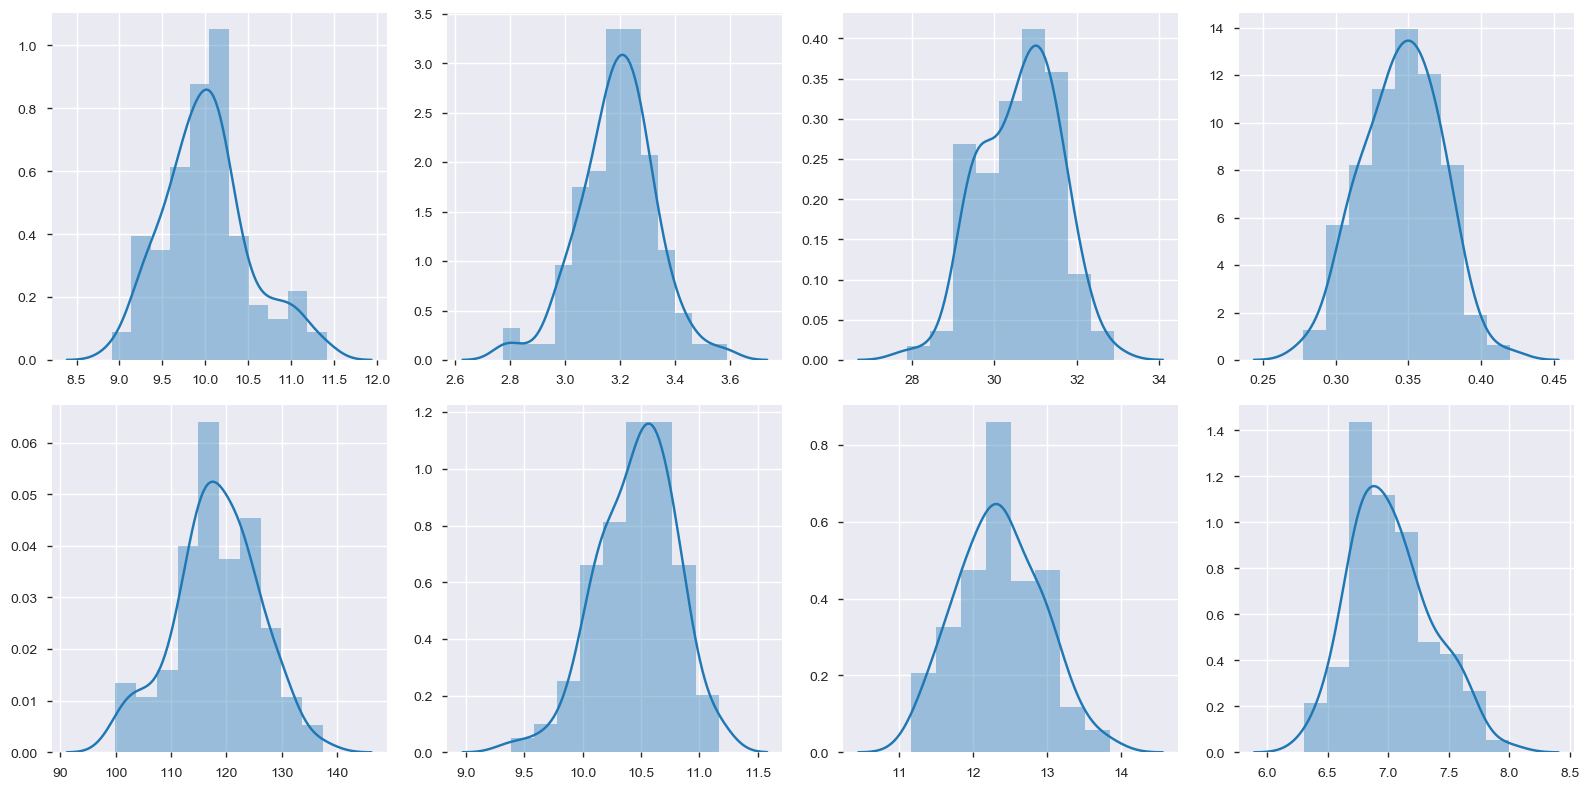

In [891]:
fig, axes = plt.subplots(2,4, figsize = (16,8), sharex=False, sharey=False)
sns.distplot([pima['age'].sample(frac=1, replace=True).std() for i in range(100)], ax=axes[0,0])
sns.distplot([pima['pregnant'].sample(frac=1, replace=True).std() for i in range(100)], ax=axes[0,1])
sns.distplot([pima['glucose'].sample(frac=1, replace=True).std() for i in range(100)], ax=axes[0,2])
sns.distplot([pima['diabetes'].sample(frac=1, replace=True).std() for i in range(100)], ax=axes[0,3])
sns.distplot([pima['insulin'].sample(frac=1, replace=True).std() for i in range(100)], ax=axes[1,0])
sns.distplot([pima['triceps'].sample(frac=1, replace=True).std() for i in range(100)], ax=axes[1,1])
sns.distplot([pima['diastolic'].sample(frac=1, replace=True).std() for i in range(100)], ax=axes[1,2])
sns.distplot([pima['bmi'].sample(frac=1, replace=True).std() for i in range(100)], ax=axes[1,3])
plt.tight_layout()

In [892]:
# UNIVARIATE ANALYSIS ON ONJECT VARIABLES

In [893]:
# #Quick and dirty with describe FOR object variable
pima.describe(include='object').T

count unique      top freq
test   392      2  negatif  262

In [894]:
pima['test'].value_counts()

negatif    262
positif    130
Name: test, dtype: int64

In [895]:
pima.describe(include='category').T

count unique          top freq
glucose_Type2-diabetes     392      2  prediabetes  320
diastolic_blood-pressure   392      3       normal  297
bmi_category               392      4        obese  262

In [896]:
pima['glucose_Type2-diabetes'].head()

0         normal
1    prediabetes
2         normal
3    prediabetes
4    prediabetes
Name: glucose_Type2-diabetes, dtype: category
Categories (3, object): [normal < prediabetes < diabetes]

In [897]:
pima['glucose_Type2-diabetes'].value_counts().sort_index()
# sort index from low to high of the category hirarchy

normal          72
prediabetes    320
diabetes         0
Name: glucose_Type2-diabetes, dtype: int64

In [898]:
pima['diastolic_blood-pressure'].value_counts().sort_index()

normal             297
prehypertension     73
high                22
Name: diastolic_blood-pressure, dtype: int64

In [899]:
pima['bmi_category'].value_counts().sort_index()

underweight      1
normal          44
overweight      85
obese          262
Name: bmi_category, dtype: int64

In [900]:
# No numeric columns could be converted to categories here. So no use of .astype()

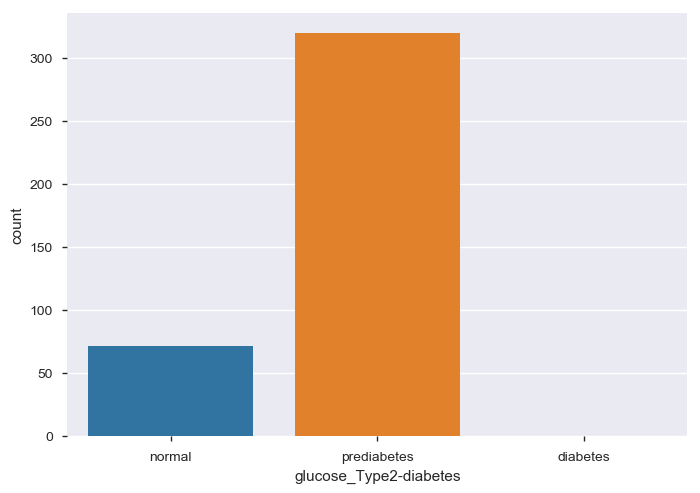

In [901]:
sns.countplot(x='glucose_Type2-diabetes', data=pima)

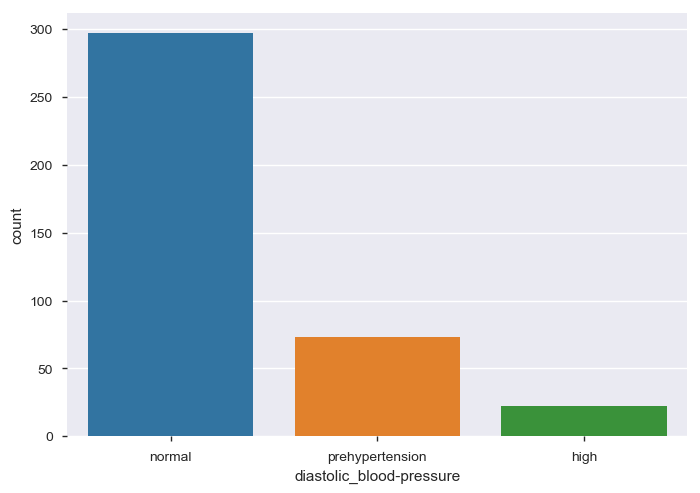

In [902]:
sns.countplot(pima['diastolic_blood-pressure'])

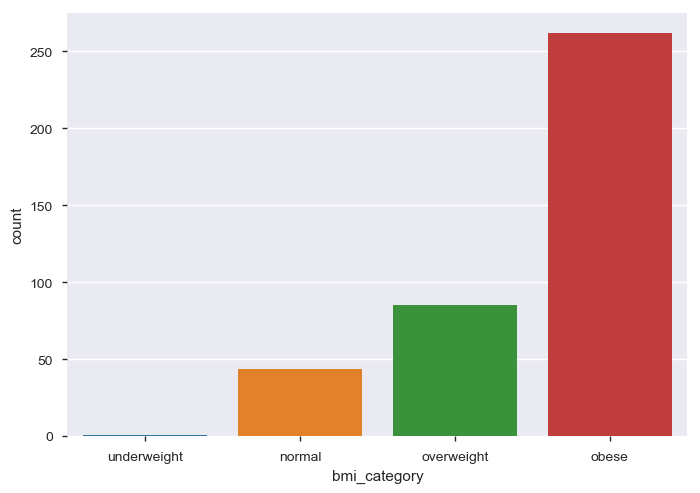

In [903]:
sns.countplot(pima['bmi_category'])

In [904]:
# Outlier defination

In [905]:
# Bivariate and Multivariate EDA

In [906]:
# CATEGORICAL VS CATEGORICAL

In [907]:
pima.dtypes

glucose_Type2-diabetes      category
diastolic_blood-pressure    category
bmi_category                category
age                            int64
pregnant                       int64
glucose                        int64
diabetes                     float64
insulin                        int64
triceps                        int64
diastolic                      int64
bmi                          float64
test                          object
dtype: object

In [908]:
type2_bp_pivot = pima.pivot_table(index='glucose_Type2-diabetes', columns='diastolic_blood-pressure', aggfunc='size')
type2_bp_pivot
# but this doesnot normalize the data, so use crosstab

diastolic_blood-pressure  normal  prehypertension  high
glucose_Type2-diabetes                                 
normal                        61                8     3
prediabetes                  236               65    19

In [909]:
type2_bp_crosstab = pd.crosstab(pima['diastolic_blood-pressure'], 
                                pima['glucose_Type2-diabetes'], normalize=True).round(4)
type2_bp_crosstab

glucose_Type2-diabetes    normal  prediabetes  diabetes
diastolic_blood-pressure                               
normal                    0.1556       0.6020       0.0
prehypertension           0.0204       0.1658       0.0
high                      0.0077       0.0485       0.0

In [910]:
# easier to see with a heatmap

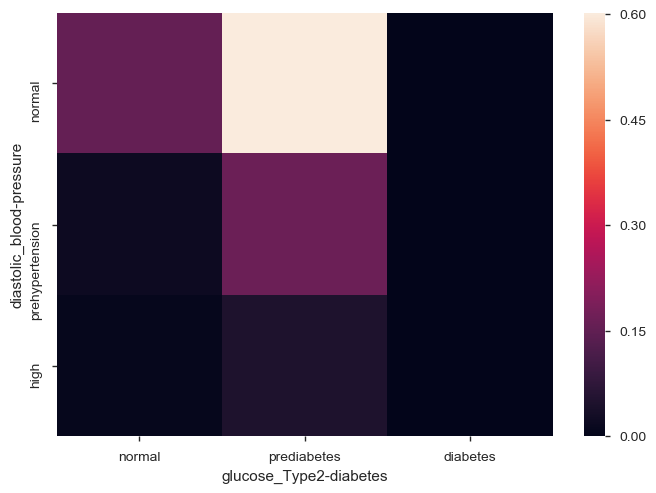

In [911]:
sns.heatmap(type2_bp_crosstab)

In [912]:
type2_bp_crosstab = pd.crosstab(pima['diastolic_blood-pressure'], 
                                pima['bmi_category'], normalize=False).round(4)
type2_bp_crosstab

bmi_category              underweight  normal  overweight  obese
diastolic_blood-pressure                                        
normal                              1      38          74    184
prehypertension                     0       5           8     60
high                                0       1           3     18

In [913]:
type2_bp_crosstab = pd.crosstab(pima['glucose_Type2-diabetes'], 
                                pima['bmi_category'], normalize=False).round(4)
type2_bp_crosstab

bmi_category            underweight  normal  overweight  obese
glucose_Type2-diabetes                                        
normal                            0       8          22     42
prediabetes                       1      36          63    220
diabetes                          0       0           0      0

In [914]:
# categorical vs continuous

In [915]:
# continuous vs continuous

In [916]:
pima.corr()

age  pregnant   glucose  diabetes   insulin   triceps  \
age        1.000000  0.679608  0.343641  0.085029  0.217082  0.167761   
pregnant   0.679608  1.000000  0.198291  0.007562  0.078984  0.093209   
glucose    0.343641  0.198291  1.000000  0.140180  0.581223  0.198856   
diabetes   0.085029  0.007562  0.140180  1.000000  0.135906  0.160499   
insulin    0.217082  0.078984  0.581223  0.135906  1.000000  0.182199   
triceps    0.167761  0.093209  0.198856  0.160499  0.182199  1.000000   
diastolic  0.300039  0.213355  0.210027 -0.015971  0.098512  0.232571   
bmi        0.069814 -0.025347  0.209516  0.158771  0.226397  0.664355   

           diastolic       bmi  
age         0.300039  0.069814  
pregnant    0.213355 -0.025347  
glucose     0.210027  0.209516  
diabetes   -0.015971  0.158771  
insulin     0.098512  0.226397  
triceps     0.232571  0.664355  
diastolic   1.000000  0.304403  
bmi         0.304403  1.000000

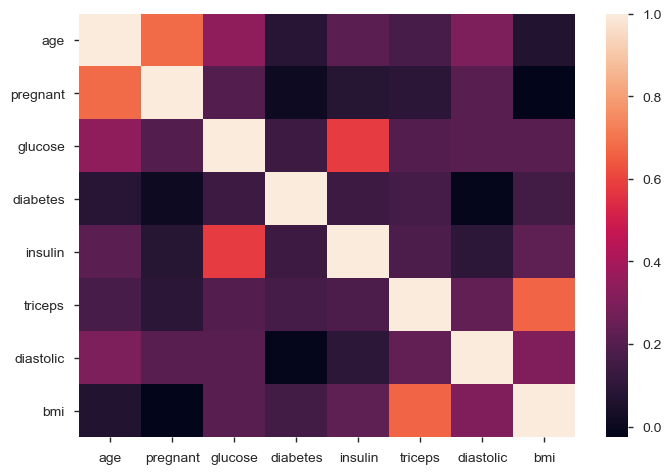

In [917]:
sns.heatmap(data=pima.corr())

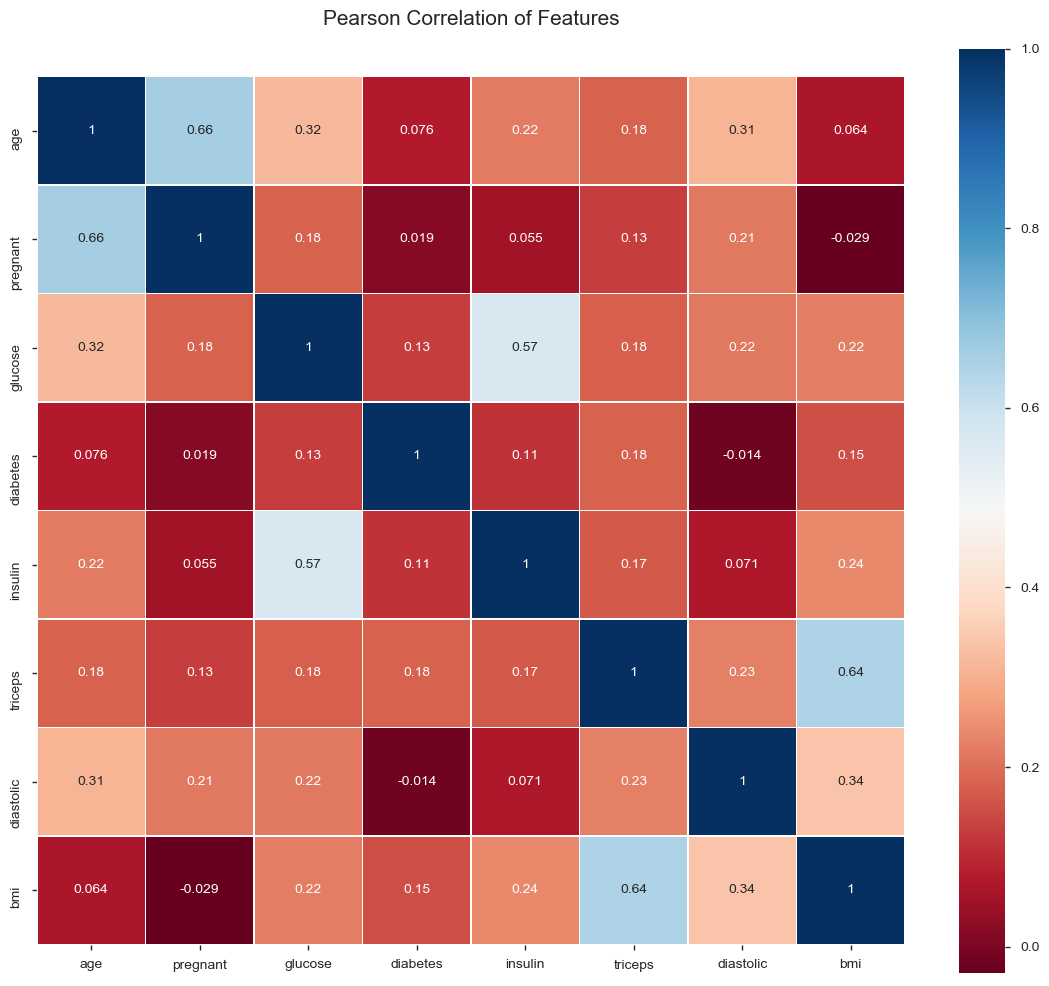

In [919]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

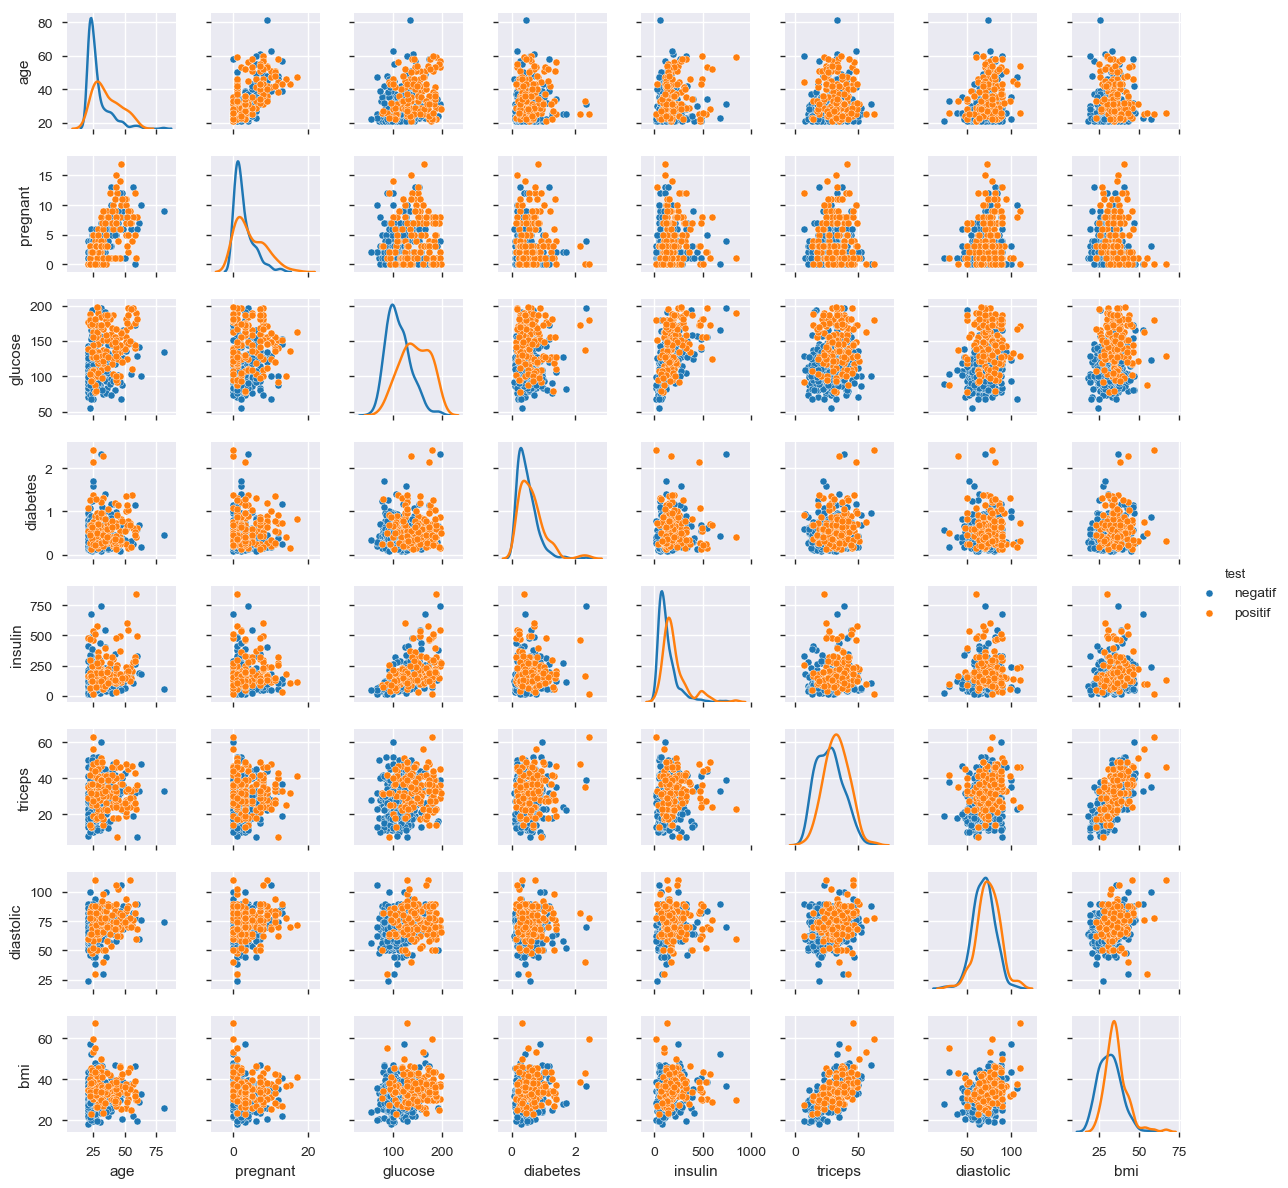

In [920]:
sns.pairplot(pima, diag_kind='kde', 
             vars=['age', 'pregnant', 'glucose', 'diabetes', 'insulin', 'triceps', 'diastolic', 'bmi'],
            hue = 'test',
            plot_kws = {'s':26}, size=1.5)

# do the same by changing all categories into numbers and then see the distribution

In [921]:
# selecting hue by different categorical types

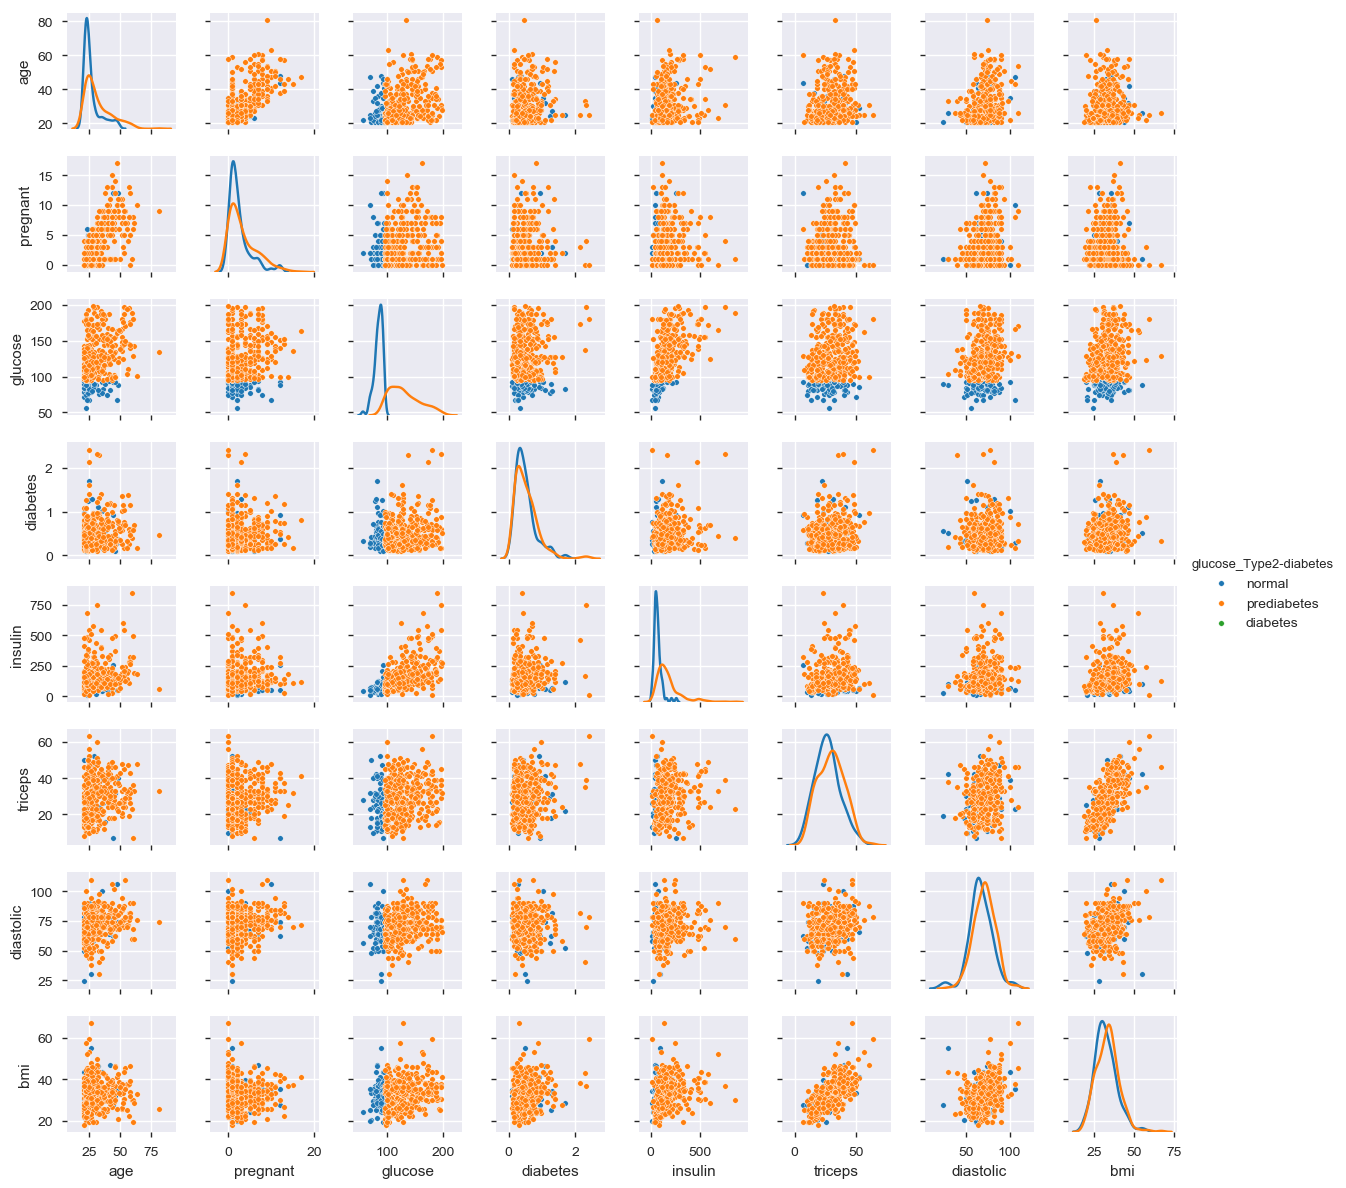

In [922]:
sns.pairplot(pima, diag_kind='kde', 
             vars=['age', 'pregnant', 'glucose', 'diabetes', 'insulin', 'triceps', 'diastolic', 'bmi'],
            hue = 'glucose_Type2-diabetes',
            plot_kws = {'s':16}, size=1.5)

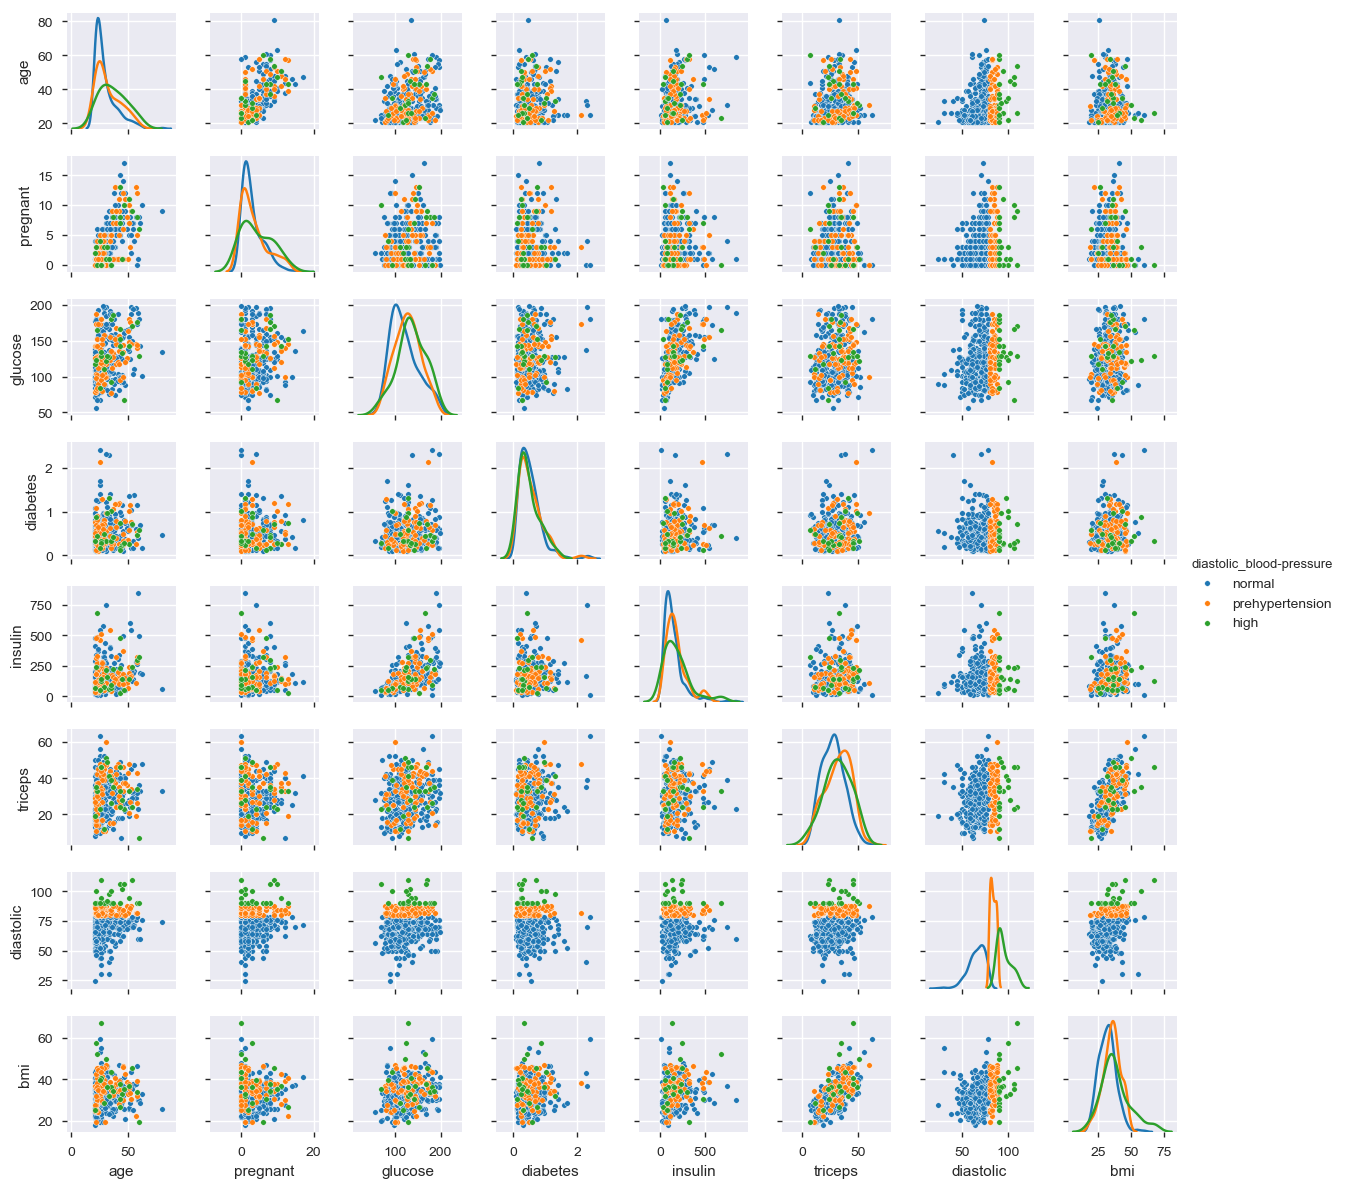

In [923]:
sns.pairplot(pima, diag_kind='kde', 
             vars=['age', 'pregnant', 'glucose', 'diabetes', 'insulin', 'triceps', 'diastolic', 'bmi'],
            hue = 'diastolic_blood-pressure',
            plot_kws = {'s':16}, size=1.5)

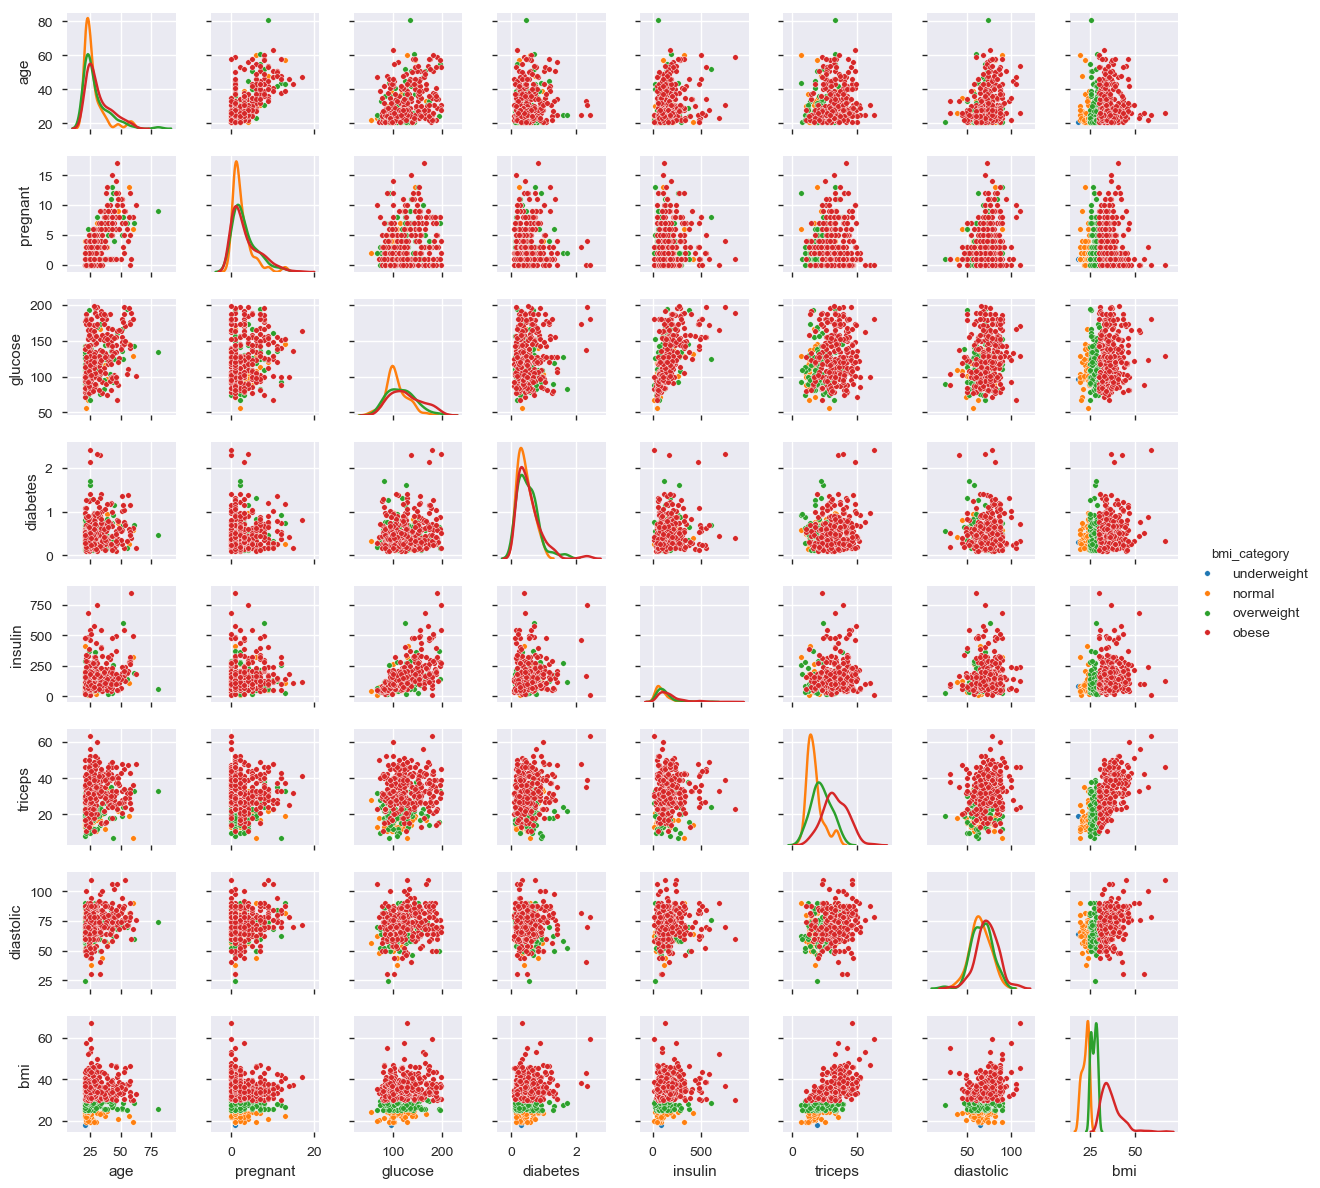

In [924]:
sns.pairplot(pima, diag_kind='kde', 
             vars=['age', 'pregnant', 'glucose', 'diabetes', 'insulin', 'triceps', 'diastolic', 'bmi'],
            hue = 'bmi_category',
            plot_kws = {'s':16}, size=1.5)

In [925]:
# ML

In [926]:
pima.head()

glucose_Type2-diabetes diastolic_blood-pressure bmi_category  age  pregnant  \
0                 normal                   normal   overweight   21         1   
1            prediabetes                   normal        obese   33         0   
2                 normal                   normal        obese   26         3   
3            prediabetes                   normal        obese   53         2   
4            prediabetes                   normal        obese   59         1   

   glucose  diabetes  insulin  triceps  diastolic   bmi     test  
0       89     0.167       94       23         66  28.1  negatif  
1      137     2.288      168       35         40  43.1  positif  
2       78     0.248       88       32         50  31.0  positif  
3      197     0.158      543       45         70  30.5  positif  
4      189     0.398      846       23         60  30.1  positif

In [927]:
pima.columns

Index(['glucose_Type2-diabetes', 'diastolic_blood-pressure', 'bmi_category',
       'age', 'pregnant', 'glucose', 'diabetes', 'insulin', 'triceps',
       'diastolic', 'bmi', 'test'],
      dtype='object')

In [928]:
from sklearn.model_selection import train_test_split

X = pima[['age', 'pregnant', 'glucose', 'diabetes', 'insulin', 'triceps',
       'diastolic', 'bmi']]
y = pima['test']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.22, random_state = 0)

In [929]:
predictors.head(2)

age  pregnant  glucose  diabetes  insulin  triceps  diastolic   bmi
0   21         1       89     0.167       94       23         66  28.1
1   33         0      137     2.288      168       35         40  43.1

In [930]:
target.head(2)

0    negatif
1    positif
Name: test, dtype: object

**Testing Different Models**

I will be testing the following models with my training data:

Gaussian Naive Bayes

Logistic Regression

Support Vector Machines

Perceptron

Decision Tree Classifier

Random Forest Classifier

KNN or k-Nearest Neighbors

Stochastic Gradient Descent

Gradient Boosting Classifier

For each model, we set the model, fit it with 80% of our training data, predict for 20% of the training data and check the accuracy.

In [931]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)

#y_pred = gaussian.predict(x_test)
#acc_gaussian = round(accuracy_score(y_pred, y_test) * 100, 2)
#print(acc_gaussian)

acc_gaussian = round(gaussian.score(X_test, y_test) *100,2)
print(acc_gaussian)

79.31


In [932]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

#y_pred = logreg.predict(x_test)
#acc_logreg = round(accuracy_score(y_pred, y_test) * 100, 2)
#print(acc_logreg)

acc_logreg = round(logreg.score(X_test, y_test) *100,2)
print(acc_logreg)

80.46


In [933]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

#y_pred = svc.predict(x_test)
#acc_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
#print(acc_svc)

acc_svc = round(svc.score(X_test, y_test) *100,2)
print(acc_svc)

67.82


In [934]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

#y_pred = linear_svc.predict(x_test)
#acc_linear_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
#print(acc_linear_svc)

acc_linear_svc = round(linear_svc.score(X_test, y_test) *100,2)
print(acc_linear_svc)

71.26


In [935]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)

#y_pred = perceptron.predict(x_test)
#acc_perceptron = round(accuracy_score(y_pred, y_test) * 100, 2)
#print(acc_perceptron)

acc_perceptron = round(perceptron.score(X_test, y_test) *100,2)
print(acc_perceptron)

59.77


In [936]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)

#y_pred = decisiontree.predict(x_test)
#acc_decisiontree = round(accuracy_score(y_pred, y_test) * 100, 2)
#print(acc_decisiontree)

acc_decisiontree = round(decisiontree.score(X_test, y_test) *100,2)
print(acc_decisiontree)

80.46


In [937]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)

#y_pred = randomforest.predict(x_test)
#acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
#print(acc_randomforest)

acc_randomforest = round(randomforest.score(X_test, y_test) *100,2)
print(acc_randomforest)

79.31


In [938]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

#y_pred = knn.predict(x_test)
#acc_knn = round(accuracy_score(y_pred, y_test) * 100, 2)
#print(acc_knn)

acc_knn = round(knn.score(X_test, y_test) *100,2)
print(acc_knn)

77.01


In [939]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)

#y_pred = sgd.predict(x_test)
#acc_sgd = round(accuracy_score(y_pred, y_test) * 100, 2)
#print(acc_sgd)

acc_sgd = round(sgd.score(X_test, y_test) *100,2)
print(acc_sgd)

67.82


In [940]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)

#y_pred = gbk.predict(x_test)
#acc_gbk = round(accuracy_score(y_pred, y_test) * 100, 2)
#print(acc_gbk)

acc_gbk = round(gbk.score(X_test, y_test) *100,2)
print(acc_gbk)

79.31


In [941]:
# Let's compare the accuracies of each model!

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

Model  Score
2           Logistic Regression  80.46
7                 Decision Tree  80.46
3                 Random Forest  79.31
4                   Naive Bayes  79.31
9  Gradient Boosting Classifier  79.31
1                           KNN  77.01
6                    Linear SVC  71.26
0       Support Vector Machines  67.82
8   Stochastic Gradient Descent  67.82
5                    Perceptron  59.77

In [942]:
# Let's select Random Forest-reason ensemble method
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)

#y_pred = randomforest.predict(x_test)
#acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2) 
score = round(randomforest.score(X_test, y_test) *100,2)
print(score)

79.31


In [943]:
'''
# HOW CV WILL work
from sklearn.model_selection import cross_val_score
scores = cross_val_score(randomforest, X_train, y_train, cv=5)
scores

scores.mean(), scores.std()```
'''

'\n# HOW CV WILL work\nfrom sklearn.model_selection import cross_val_score\nscores = cross_val_score(randomforest, X_train, y_train, cv=5)\nscores\n\nscores.mean(), scores.std()```\n'

In [944]:
# Optimizing 1 parameter
depth_list=[]
score= []
for md in range(1,20): # md: maximum depth
    depth_list.append(md)
    randomforest = RandomForestClassifier(max_depth=md)
    randomforest.fit(X_train,y_train)
    s=randomforest.score(X_test, y_test)
    score.append(s)
print(score)
print(depth_list)

[0.7241379310344828, 0.7586206896551724, 0.7816091954022989, 0.8045977011494253, 0.7816091954022989, 0.7931034482758621, 0.7471264367816092, 0.7586206896551724, 0.7126436781609196, 0.8045977011494253, 0.8160919540229885, 0.7816091954022989, 0.7701149425287356, 0.8045977011494253, 0.7931034482758621, 0.8045977011494253, 0.7701149425287356, 0.8160919540229885, 0.8045977011494253]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [945]:
for i,s in zip(depth_list, score):
    print(i,s)

1 0.7241379310344828
2 0.7586206896551724
3 0.7816091954022989
4 0.8045977011494253
5 0.7816091954022989
6 0.7931034482758621
7 0.7471264367816092
8 0.7586206896551724
9 0.7126436781609196
10 0.8045977011494253
11 0.8160919540229885
12 0.7816091954022989
13 0.7701149425287356
14 0.8045977011494253
15 0.7931034482758621
16 0.8045977011494253
17 0.7701149425287356
18 0.8160919540229885
19 0.8045977011494253


In [946]:
max(score)

0.8160919540229885

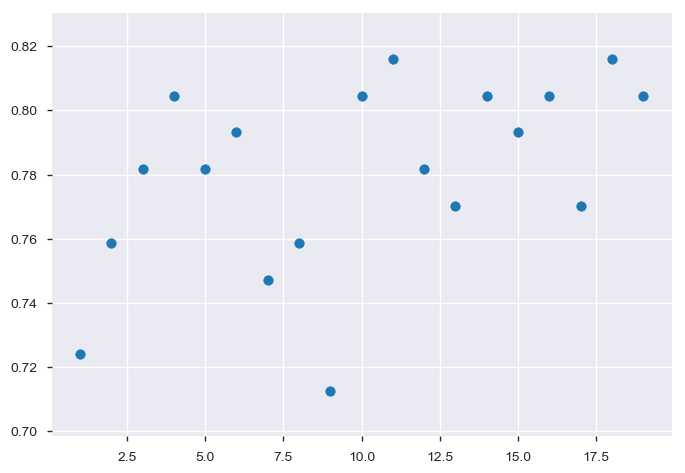

In [947]:
plt.scatter(x=depth_list, y=score)

In [948]:
# optimizing 2 paremeters

from sklearn.model_selection import KFold
depths = np.arange(1, 20)
splits = np.arange(2, 20)
kf = KFold(n_splits=5, shuffle=True) 


all_scores = np.zeros((len(depths), len(splits)))
for i, depth in enumerate(depths):
    for j, split in enumerate(splits):
        randomforest = RandomForestClassifier(max_depth=depth, min_samples_split=split)
        scores = cross_val_score(randomforest, X, y, cv=kf) # kfold donot require splitted X and y
        all_scores[i, j] = scores.mean()

Text(117.861,0.5,'max_depth')

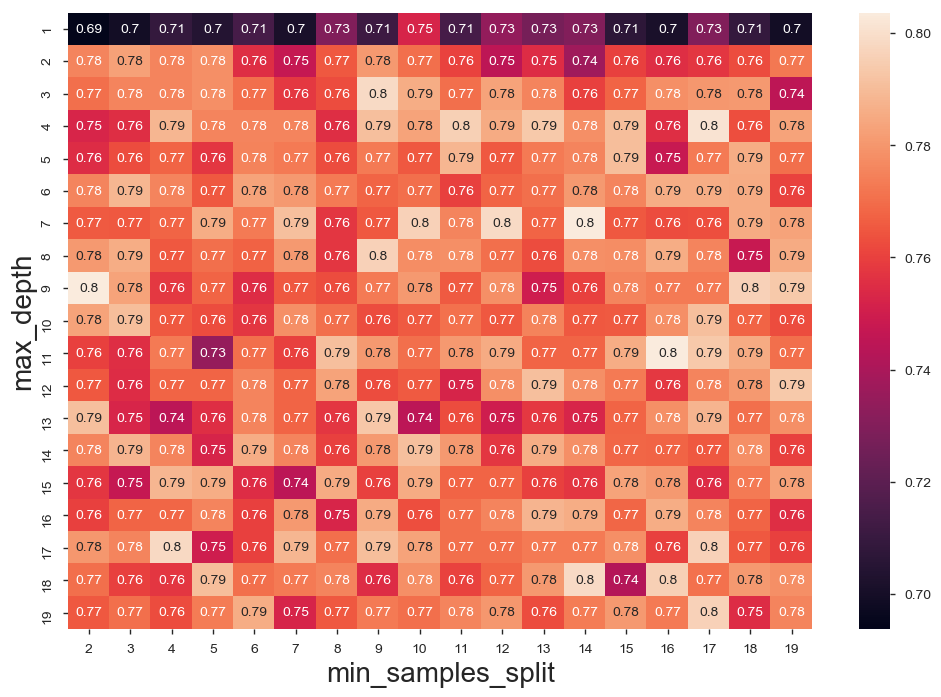

In [949]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(all_scores, ax=ax, xticklabels=splits, yticklabels=depths, annot=True)
ax.set_xlabel('min_samples_split', size=20)
ax.set_ylabel('max_depth', size=20)

In [950]:
# so final model
RandomForest_manual = RandomForestClassifier(max_depth=12, min_samples_split=11)
RandomForest_manual

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=11,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [951]:
# easy way of doing this GridSearchCV AND FIND BEST HYPERPARAMETERS
from sklearn.model_selection import GridSearchCV
depths = np.arange(1, 32)
splits = np.arange(2, 20)
#estimators = np.arange(5,50)

In [952]:
param_grid = {'max_depth': depths, 
              'min_samples_split': splits,
             }

In [953]:
randomforest = RandomForestClassifier()

In [954]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True)

In [955]:
# instantiate
gs = GridSearchCV(randomforest, param_grid=param_grid)

In [956]:
# fit
gs.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]), 'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [957]:
gs.best_params_

{'max_depth': 17, 'min_samples_split': 13}

In [958]:
gs.best_score_

0.8112244897959183

In [959]:
# gs.cv_results_# hard to read by itself s convert into a df
df = pd.DataFrame(gs.cv_results_)
pd.options.display.max_columns=100

df.sort_values('mean_test_score', ascending=False).head(2)
# we mostly care about mean_test_score. Top rows will show better test_Score as df is sorted

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
299       0.009310         0.001329         0.811224          0.910726   
500       0.010226         0.001663         0.808673          0.901771   

    param_max_depth param_min_samples_split  \
299              17                      13   
500              28                      16   

                                         params  rank_test_score  \
299  {'max_depth': 17, 'min_samples_split': 13}                1   
500  {'max_depth': 28, 'min_samples_split': 16}                2   

     split0_test_score  split0_train_score  split1_test_score  \
299           0.765152            0.915385           0.807692   
500           0.765152            0.896154           0.792308   

     split1_train_score  split2_test_score  split2_train_score  std_fit_time  \
299            0.919847           0.861538            0.896947      0.000470   
500            0.916031           0.869231            0.893130      0.000358   

     std_score_time  std_test_score  std_train_score  
299        0.000469        0.039477         0.009913  
500        0.000471        0.044077         0.010158

In [960]:
randomforest_best_gs = gs.best_estimator_
randomforest_best_gs

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=17, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=13,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [961]:
# Once we do that we can improve one parameter at a time

In [962]:
# we know best max_depth=9
randomforest = RandomForestClassifier(max_depth=9, criterion='gini')

In [963]:
param_grid = { 
              'min_samples_split': splits}
# as we fixed max_depth as I feel confident about it, we have to remove max_depth from parameter grid

In [964]:
gs1 = GridSearchCV(randomforest, param_grid=param_grid)
gs1.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [965]:
gs1.best_params_

{'min_samples_split': 5}

In [966]:
gs1.best_score_

0.798469387755102

In [967]:
# we know best max_depth=9
randomforest = RandomForestClassifier(max_depth=9, min_samples_split= 16, criterion='gini')

In [968]:
estimators = np.arange(1,50)
param_grid = { 
              'n_estimators': estimators}

In [969]:
gs2 = GridSearchCV(randomforest, param_grid=param_grid)
gs2.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=16,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [970]:
gs2.best_params_

{'n_estimators': 13}

In [971]:
gs2.best_score_

0.8035714285714286